In [1]:
'''Import section'''

from __future__ import print_function
from __future__ import absolute_import


import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [2]:
openfish = pd.read_csv('phishurls.txt_results.csv')
alexa = pd.read_csv('popularsites.txt_results.csv')

frames = [openfish,alexa]
merged = pd.concat(frames)
merged.to_csv("output_final.csv", index=False)


In [3]:
#Later used for labeling tree data output. 

uci = pd.read_csv('output_final.csv', index_col=None)

uci.head()

havingIP  urlOfAnchor  redirect  linksInTags  domainRegistrationLength  \
0        -1           -1         0            0                        -1   
1        -1           -1         0            0                        -1   
2        -1           -1         0            0                        -1   
3        -1           -1         0            0                        -1   
4        -1           -1         0            0                        -1   

   havingAtSymbol  doubleSlashRedirecting  port  popUpWindow  httpsToken  \
0               1                       1    -1           -1          -1   
1               1                       1    -1            0          -1   
2               1                       1    -1           -1          -1   
3               1                       1    -1            0           1   
4              -1                       1    -1            0           1   

     ...     favicon  urlLength  getageOfDomain  prefixSuffix  usingIPAddress  \
0    ...          -1          0               1            -1               1   
1    ...           1          0              -1            -1               1   
2    ...           1         -1              -1            -1               1   
3    ...           1         -1               1            -1               1   
4    ...           1         -1              -1            -1               1   

   havingSubDomain  dnsRecord  statisticalReport  requestURL  isPhishy  
0               -1          0                  0           0         1  
1               -1          0                  0           0         1  
2               -1          0                  0           0         1  
3               -1          0                  0           0         1  
4               -1          0                  0           0         1  

[5 rows x 23 columns]

In [4]:
training_data = np.genfromtxt('output_final.csv',delimiter=',',dtype=np.int32)

print(uci.columns)
print('The number of columns is {}'.format(len(uci.columns)))

Index(['havingIP', 'urlOfAnchor', 'redirect', 'linksInTags',
       'domainRegistrationLength', 'havingAtSymbol', 'doubleSlashRedirecting',
       'port', 'popUpWindow', 'httpsToken', 'sfh', 'onMouseOver',
       'abnormalUrl', 'favicon', 'urlLength', 'getageOfDomain', 'prefixSuffix',
       'usingIPAddress', 'havingSubDomain', 'dnsRecord', 'statisticalReport',
       'requestURL', 'isPhishy'],
      dtype='object')
The number of columns is 23


In [5]:
#Split data into x(features) and y(label)
inputs = training_data[:,:-1]
outputs = training_data[:,-1]


#split data by 25%
x_train ,x_test,y_train, y_test = train_test_split(inputs,outputs,test_size=0.25)       #test_size=0.2(whole_data)

print(len(x_test))
print(len(x_train))

4447
13341


In [21]:
lgr = LogisticRegression(solver='liblinear', max_iter=10000, multi_class='auto')#‘liblinear’	‘lbfgs’	‘newton-cg’	‘sag’	‘saga’

lgr.fit(x_train,y_train)
lgr_accuracy = (lgr.score(x_test, y_test)*100)
print(lgr_accuracy)


93.29885315943332


In [7]:
predictions = lgr.predict(x_test)
lgr.score(x_test, y_test)

accuracy = 100.0 * lgr.score(x_test, y_test)

print ("The accuracy of your Logistic Regression on testing data is: " + str(accuracy))

The accuracy of your Logistic Regression on testing data is: 93.29885315943332


In [8]:
dt = tree.DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
tree_prediction = dt.predict(x_test)

dt_accuracy = 100.0 * accuracy_score(y_test, tree_prediction)

print ("The accuracy of your Tree on testing data is: " + str(accuracy))

The accuracy of your Tree on testing data is: 93.29885315943332


In [22]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file='tree_limited.dot',
                rounded = True, proportion = False, precision = 2, filled = True, feature_names=uci.columns[1:])

!dot -Tpng tree_limited.dot -o tree_limited.png

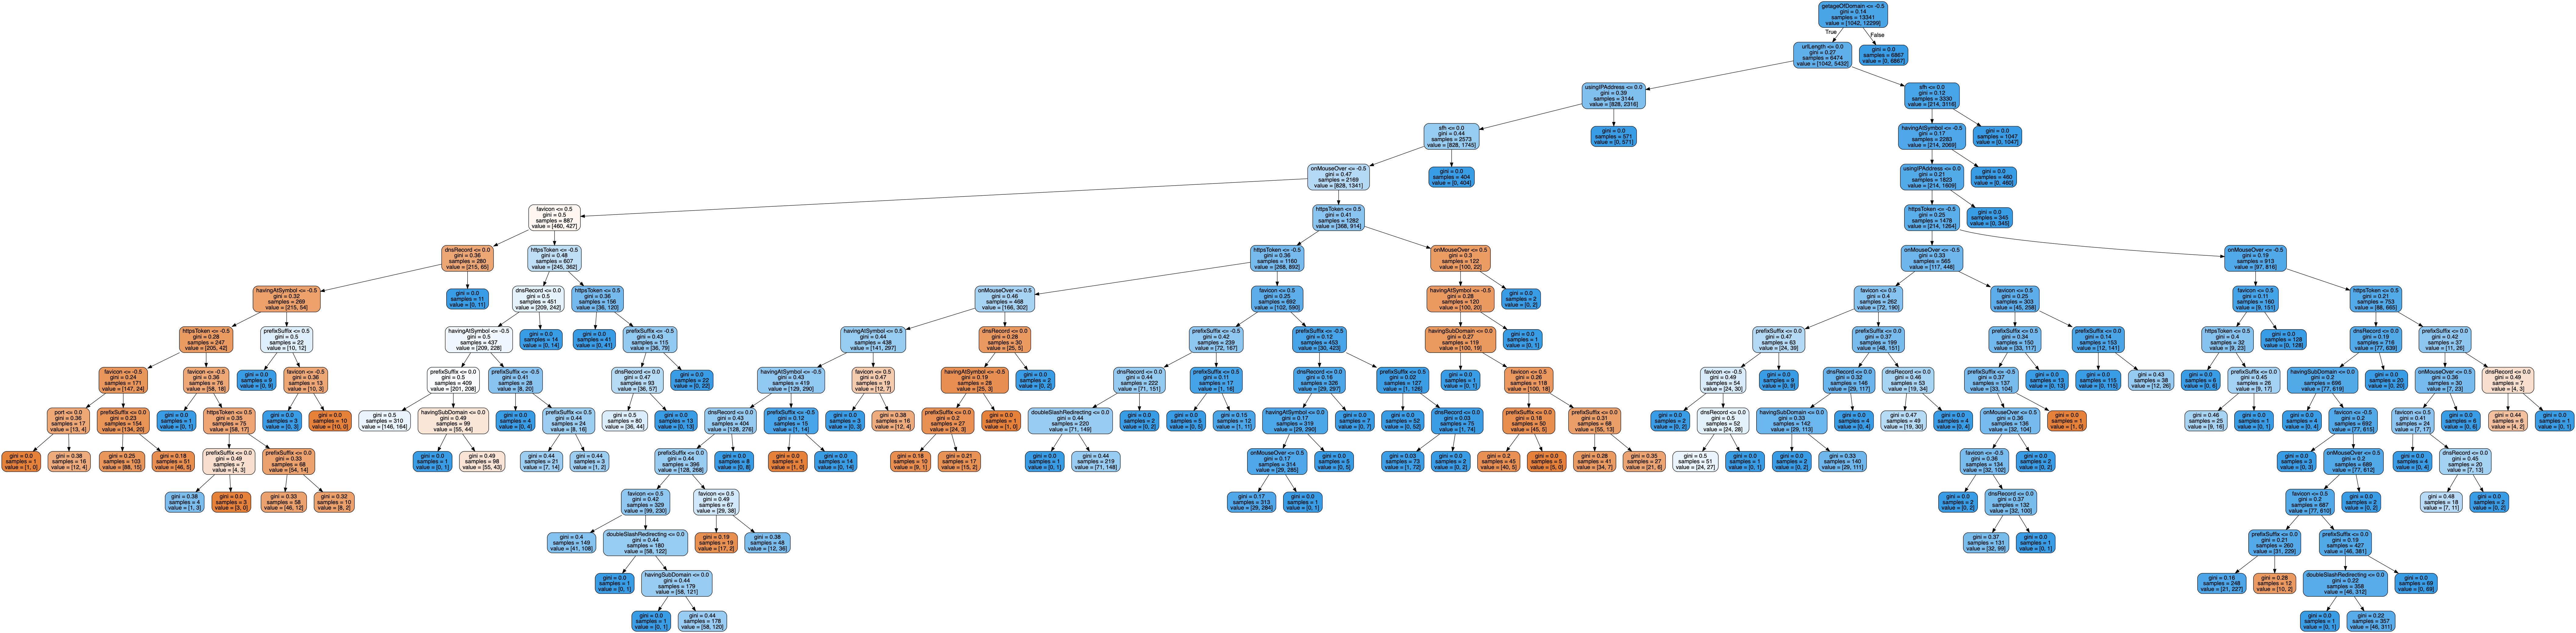

In [23]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [12]:
kn = KNeighborsClassifier(weights='distance', algorithm='kd_tree')# 'algorithm' = auto', 'ball_tree', 'kd_tree', 'brute'
lp = LabelPropagation(kernel='knn')
svc = SVC(kernel='linear')#kernel='poly',gamma='scale')#kernel= ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
gp = GaussianProcessClassifier()
rf = RandomForestClassifier()
mlp = MLPClassifier()#solver : {‘lbfgs’, ‘sgd’, ‘adam’},
ada = AdaBoostClassifier()
gnb = GaussianNB()
quad = QuadraticDiscriminantAnalysis()



In [13]:
'''First iteration at basic settings for classifiers.'''

classifiers = {
                "lp":lp, 
               "svc":svc, 
               "rf":rf, 
               "mlp":mlp, 
               "ada":ada, 
               "gnb":gnb, 
               
              }
labels_list = []
scores = []
for labels, item in classifiers.items():
    labels_list.append(labels)  
    item.fit(x_train, y_train)
    score = (item.score(x_test, y_test)*100)
    scores.append(score)
    print('The accuracy of {} is {}'.format(labels,score))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


The accuracy of lp is 91.97211603328086
The accuracy of svc is 93.20890487969417
The accuracy of rf is 94.62559028558579


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of mlp is 94.04092646728131
The accuracy of ada is 93.50123678884641
The accuracy of gnb is 88.37418484371486


In [22]:
scores.append(lgr_accuracy)
labels_list.append('lgr')
scores.append(dt_accuracy)
labels_list.append('dt')
print(labels_list)


['lp', 'svc', 'rf', 'mlp', 'ada', 'gnb', 'lgr', 'lgr', 'dt', 'lgr', 'dt']


<BarContainer object of 11 artists>

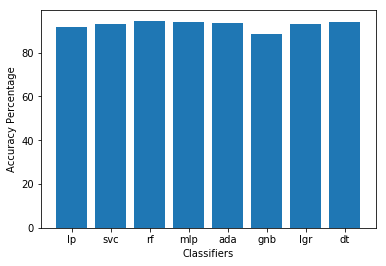

In [23]:
%matplotlib inline


plt.xlabel('Classifiers')
plt.ylabel('Accuracy Percentage')
plt.bar(labels_list,scores)

In [32]:
ls = LabelSpreading(kernel='rbf')
ls.fit(x_train, y_train)
ls.score(x_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


0.5596960926193922

In [25]:
mlp2 = MLPClassifier(solver='adam',activation='logistic',
                    hidden_layer_sizes=(150, 5),
                    learning_rate='adaptive', verbose=True,
                    warm_start=True)#solver : {‘lbfgs’, ‘sgd’, ‘adam’},activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
mlp2.fit(x_train, y_train)# learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}
#mlp2.score(x_test, y_test)
# print(mlp2)

Iteration 1, loss = 0.56114063
Iteration 2, loss = 0.44218265
Iteration 3, loss = 0.37956993
Iteration 4, loss = 0.34191800
Iteration 5, loss = 0.31798085
Iteration 6, loss = 0.30258456
Iteration 7, loss = 0.29253951
Iteration 8, loss = 0.28596745
Iteration 9, loss = 0.28168534
Iteration 10, loss = 0.27883949
Iteration 11, loss = 0.27683755
Iteration 12, loss = 0.27452829
Iteration 13, loss = 0.25629723
Iteration 14, loss = 0.22857472
Iteration 15, loss = 0.21221884
Iteration 16, loss = 0.20157334
Iteration 17, loss = 0.19376093
Iteration 18, loss = 0.18746527
Iteration 19, loss = 0.18279033
Iteration 20, loss = 0.17895074
Iteration 21, loss = 0.17590450
Iteration 22, loss = 0.17264417
Iteration 23, loss = 0.17048291
Iteration 24, loss = 0.16820065
Iteration 25, loss = 0.16654406
Iteration 26, loss = 0.16497903
Iteration 27, loss = 0.16345644
Iteration 28, loss = 0.16227303
Iteration 29, loss = 0.16125523
Iteration 30, loss = 0.16041530
Iteration 31, loss = 0.15929845
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(150, 5), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=True)

In [26]:
mlp2.score(x_test, y_test)
# gnb2 = GaussianNB()
# gnb2.fit(x_train, y_train)
# print(gnb2)

0.9399595232741174

In [39]:
gnb.score(x_test, y_test)

0.8803687879469305

In [44]:
rf2 = RandomForestClassifier(criterion='gini')#criterion : 'gini'(97%), 'entropy'(97%) (default=”gini”)
rf2.fit(x_train, y_train)# verbose : int, optional (default=0)



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rf2.score(x_test, y_test)

0.9500787047447717

In [69]:


from sklearn.tree import export_graphviz

export_graphviz(rf2.estimators_[9], out_file='random_forest9.dot',
                rounded = True, proportion = True, precision = 2, filled = True, feature_names=uci.columns[1:])

!dot -Tpng random_forest9.dot -o random_forest9.png

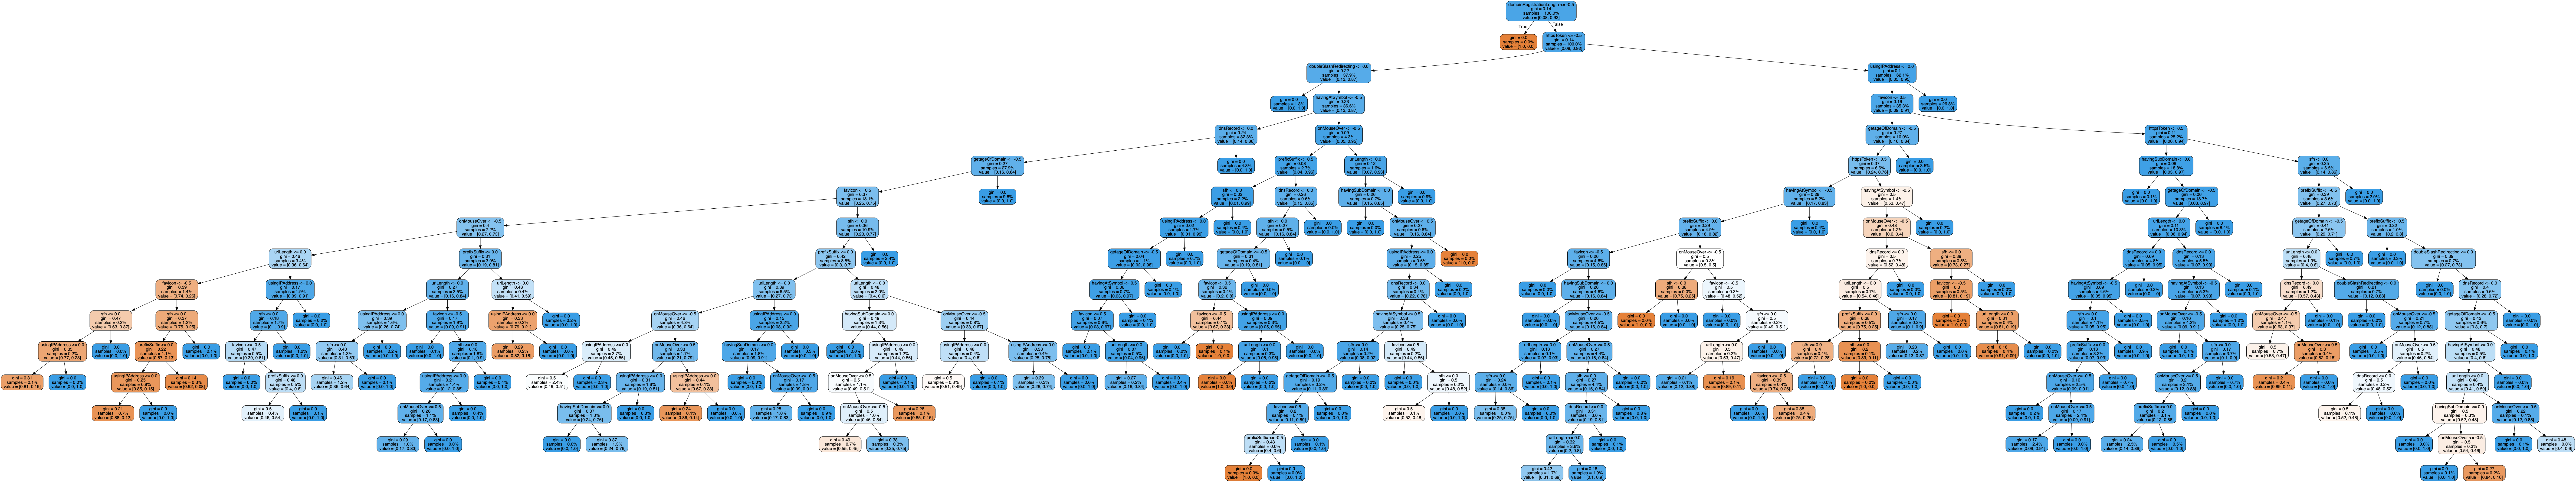

In [78]:
from IPython.display import Image
Image(filename = 'random_forest9.png')

In [47]:
print(len(rf2.estimators_))

10


In [106]:
ada2 = AdaBoostClassifier(algorithm='SAMME.R',
                         
                         base_estimator=DecisionTreeClassifier(),
                         )
#(algorithm='SAMME.R', base_estimator=None,learning_rate=1.0, n_estimators=50, random_state=None)
ada2.fit(x_train, y_train)



AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [107]:
ada2.score(x_test, y_test)

0.9500787047447717

Feature: havingIP  Weight: 0.0
Feature: urlOfAnchor  Weight: 0.0
Feature: redirect  Weight: 0.035054809778371145
Feature: linksInTags  Weight: 0.0382651612909416
Feature: domainRegistrationLength  Weight: 3.3424194208420404
Feature: havingAtSymbol  Weight: 0.17754671069303132
Feature: doubleSlashRedirecting  Weight: 0.0
Feature: port  Weight: 0.0007098623530012589
Feature: popUpWindow  Weight: 14.12009992060752
Feature: httpsToken  Weight: 12.074471292019537
Feature: sfh  Weight: 11.088601262542246
Feature: onMouseOver  Weight: 0.0
Feature: abnormalUrl  Weight: 8.250193888756016
Feature: favicon  Weight: 13.443139964682087
Feature: urlLength  Weight: 18.633004978152854
Feature: getageOfDomain  Weight: 4.8195525660852425
Feature: prefixSuffix  Weight: 10.814416146516262
Feature: usingIPAddress  Weight: 0.24458413565418544
Feature: havingSubDomain  Weight: 2.8948761653234687
Feature: dnsRecord  Weight: 0.016387970423995743
Feature: statisticalReport  Weight: 0.006675744279198409
Feature:

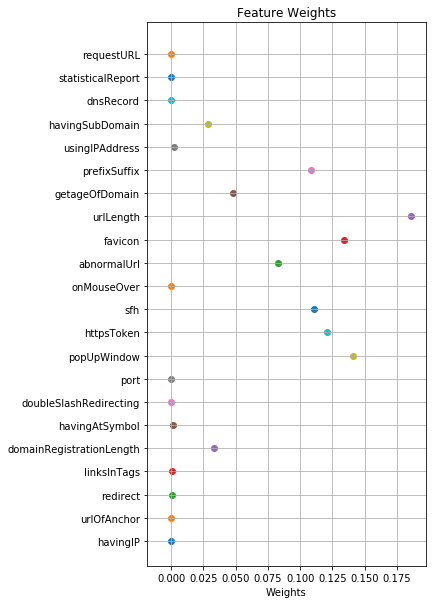

In [84]:
feature_weights = dict(zip(uci.columns,rf2.feature_importances_))
# del feature_weights['isPhishy']
for item, values in feature_weights.items():
    print('Feature: {}  Weight: {}'.format(item, float(values*100)))
    
    plt.scatter(values, item)
plt.title('Feature Weights')
plt.xlabel('Weights')
plt.grid(True)
plt.gcf().set_size_inches((5, 10))
plt.show()

Feature: havingIP  Weight: 0.0
Feature: urlOfAnchor  Weight: 0.0
Feature: redirect  Weight: 3.49723267029392
Feature: linksInTags  Weight: 2.9589558296674494
Feature: domainRegistrationLength  Weight: 2784.7640280299674
Feature: havingAtSymbol  Weight: 32.60165237568206
Feature: doubleSlashRedirecting  Weight: 1.3450420685869349
Feature: port  Weight: 0.1973467664155035
Feature: popUpWindow  Weight: 7799.447975972471
Feature: httpsToken  Weight: 1372.7257070165958
Feature: sfh  Weight: 3559.0131964772445
Feature: onMouseOver  Weight: 0.0
Feature: abnormalUrl  Weight: 8726.281336558188
Feature: favicon  Weight: 4737.7523458467
Feature: urlLength  Weight: 2736.9083225196164
Feature: getageOfDomain  Weight: 6148.15108654389
Feature: prefixSuffix  Weight: 1565.793657934298
Feature: usingIPAddress  Weight: 32.00127044478927
Feature: havingSubDomain  Weight: 493.25244965649415
Feature: dnsRecord  Weight: 0.0
Feature: statisticalReport  Weight: 2.2846994299308707
Feature: requestURL  Weight: 

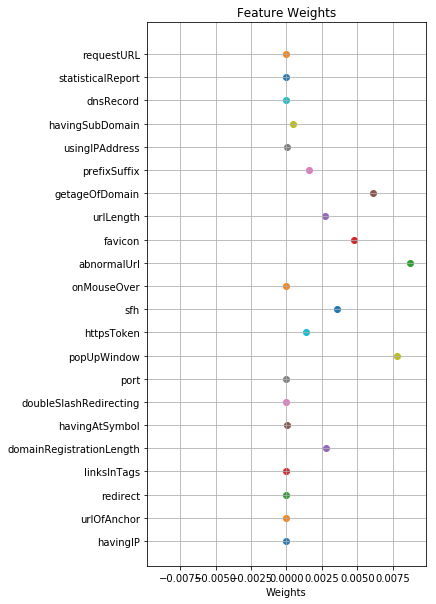

In [95]:
feature_weights = dict(zip(uci.columns,ada2.feature_importances_))
# del feature_weights['isPhishy']
for item, values in feature_weights.items():
    print('Feature: {}  Weight: {}'.format(item, float(values*1000000)))
    
    plt.scatter(values, item)
plt.title('Feature Weights')
plt.xlabel('Weights')
plt.grid(True)
plt.gcf().set_size_inches((5, 10))
plt.show()

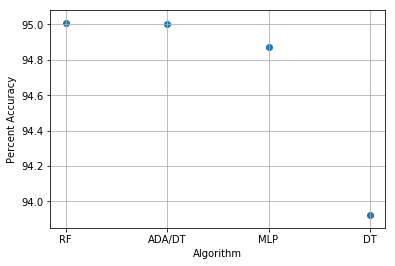

In [118]:
percents = [95.01,95.00,94.87,93.92]
label_diag = ['RF','ADA/DT', 'MLP', 'DT']

# 1.	Random Forrest: 95.01%
# 2.	AdaBoost w/ Decision Tree as base: 95.00%
# 3.	Multi-Layer Perceptron: 94.87%
# 4.	Decision Tree: 93.92%

plt.ylabel('Percent Accuracy')
plt.xlabel('Algorithm')
plt.scatter(label_diag, percents )
plt.grid(True)
plt.show()